In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [20]:
data = pd.read_csv('test.csv')

In [21]:
data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [22]:
data.shape

(2947, 563)

In [23]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [24]:
data = data.dropna()
data = data.drop_duplicates()

In [25]:
data.describe().style.format('{:.2f}')


In [26]:
Labels = data['Activity']

data = data.drop(columns=['Activity'])

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

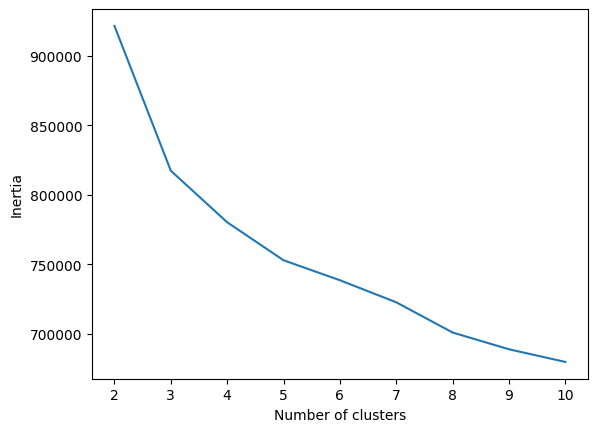

In [28]:
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    return inertia

inertia = kmeans_inertia(num_clusters, X_scaled)

plot = sns.lineplot(x=num_clusters, y=inertia)
plot.set_xlabel("Number of clusters")
plot.set_ylabel("Inertia")
plt.show()

In [29]:
def kmeans_sil(num_clusters, x_vals):
    
  
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    
    return sil_score

sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

[0.3913060431047856,
 0.3036629820782968,
 0.2617947200995213,
 0.10727963686410959,
 0.11694673952858103,
 0.07412436500237968,
 0.09012494535365602,
 0.07268125708255284,
 0.07868735922494742]

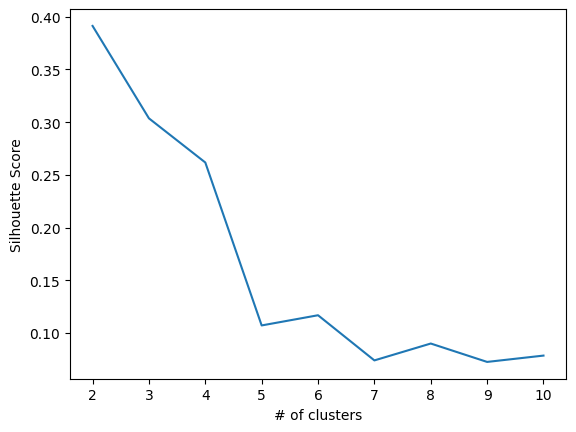

In [30]:
plot = sns.lineplot(x=num_clusters, y=sil_score)
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

In [31]:
k_means = KMeans(n_clusters=3)
k_means.fit(X_scaled)

KMeans(n_clusters=3)

In [36]:
print(f'silhouette_score:{silhouette_score(X_scaled, k_means.labels_)}')

print(f'inertia : {kmeans_inertia(num_clusters, X_scaled)}')


silhouette_score:0.3022954732640848
inertia : [921292.1456745277, 817247.6501792278, 780215.6029025493, 759539.1548582288, 739905.9512934496, 721260.3326584925, 707314.734433174, 686728.9136563247, 675102.528964835]


In [32]:
df = pd.DataFrame({'clust_label': k_means.labels_, 'orig_label': Labels.tolist()})

ct = pd.crosstab(df['clust_label'], df['orig_label'])
ct

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,0,0,0,212,282,59
1,533,485,529,0,0,0
2,4,6,3,284,138,412
